# KNN is classification method
- 引入套件：from sklearn.preprocessing import StandardScalar 標準化區間
- from sklearn.neighbors import KNeighborsClassifier
- scaler.transform(整張資料表.drop(label,axis=1))
- 群數越高，可能會發生overfitting的問題



- 優1：帶的參數只有：K(新樣本要跟幾個特徵樣本比) 與 Distance Metric(用什麼樣的方式判斷距離最近)
- 優2：taining 只要排序整理資料，很 trivial
- 劣1：因為在 testing 階段才會陸續與現有特徵集合比較，所以當在用X_test 做 prediction 遇到高維度的特徵的時候，會要花好很多時間在比較，cost很高
- 劣2：Categorical Features 在比較時因為類別會不好比較，所以演算法會不好辨別，成效比較差。


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
%matplotlib inline

/Users/jiajiaping/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df=pd.read_csv("Classified Data")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# 把全部的特徵值都標準化區間
- 我想是因為要計算與特徵集合的距離，那距離如果有些差異太大，這些誤差會被計入，所以要先標準化
- from sklearn.preprocessing import StandardScaler
- scaler.fit(df) 計算df的標準差與平均數
- scaler.transform(df) 將特徵全部轉換為標準化的df

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler=StandardScaler()

In [6]:
scaler.fit(df.drop("TARGET CLASS",axis=1)) # 先去計算平均值和標準差
scaled_features=scaler.transform(df.drop("TARGET CLASS",axis=1))

In [7]:
#把全部的值都
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [8]:
X_train,X_test,y_train,y_test=train_test_split(df_feat,df["TARGET CLASS"],test_size=0.3,random_state=101)

# Import Machine Learning algorithm

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
KNN=KNeighborsClassifier(n_neighbors=34)
KNN.fit(X_train,y_train)
y_predict=KNN.predict(X_test)
print(KNN.score(X_train,y_train))

0.9428571428571428


In [11]:
confusion_matrix(y_test,y_predict)

array([[153,   6],
       [  7, 134]])

In [12]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[153   6]
 [  7 134]]
             precision    recall  f1-score   support

          0       0.96      0.96      0.96       159
          1       0.96      0.95      0.95       141

avg / total       0.96      0.96      0.96       300



# 找出能讓 Error_rate 最小的K
- 用for 迴圈 測試續多參數
- #要確保點的位置座標就要用到marker
- #利用boolean計算 error rate
    #代表不相符的個數全部加起來，條件為True = 1 加起來，可以用來計算個數，進而可以用平均求error_rate np.mean()，因為分母是以個數計算=>求得不match的value個數/總個數

In [13]:
error_rate={}

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict=knn.predict(X_test)
    
    #利用boolean計算 error rate
    #代表不相符的個數全部加起來，條件為True = 1 加起來，可以用來計算個數，進而可以用平均求error_rate np.mean()，因為分母是以個數計算=>求得不match的value個數/總個數
    error_rate[str(i)]=(np.mean(y_test != predict))

In [38]:
result=pd.DataFrame(list(error_rate.values()),index=error_rate.keys(),columns=["QQ"])
result.nsmallest(10,"QQ")

,QQ
34,0.043333
36,0.043333
38,0.043333
12,0.046667
18,0.046667
28,0.046667
32,0.046667
35,0.046667
37,0.046667
3,0.050000


In [15]:
list(error_rate.values())

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

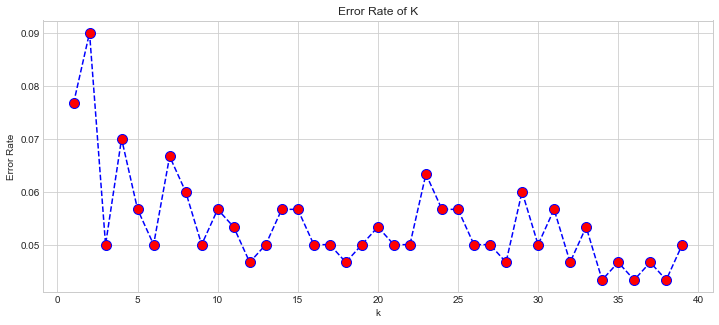

In [39]:

plt.figure(figsize=(12,5))

#result["QQ"].plot(color="blue",ls="--",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate of K")
plt.xlabel("k")
plt.ylabel("Error Rate")
sns.set_style("whitegrid")
plt.plot(range(1,len(error_rate)+1),error_rate.values(),color="blue",ls="--",marker="o",markerfacecolor="red",markersize=10)

In [20]:
np.arange(30)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [29]:
result.head(3)

,QQ
1,0.076667
10,0.056667
11,0.053333


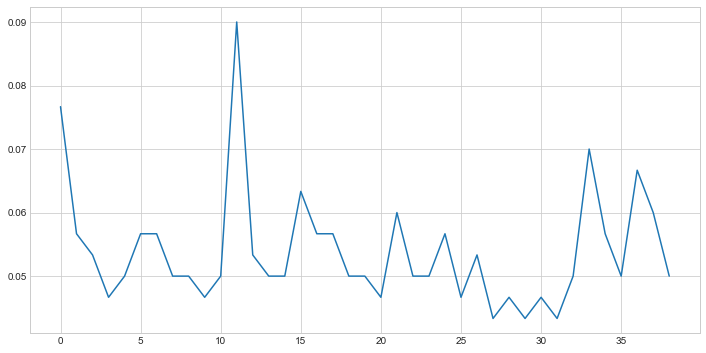

In [35]:
plt.figure(figsize=(12,6))
plt.plot(result.index,result["QQ"])

# Why use parameter of result cannot show correct graph

In [25]:
result.sort_index(inplace=True,ascending=True)

In [26]:
result.head(4)

,QQ
1,0.076667
10,0.056667
11,0.053333
12,0.046667
